In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/ML/Dataset_V1.csv')

In [ ]:
dataset.head()

,Gender,Attendance(10),Absence(10),Mid Term,Final Term,Total Grade,Class
0,F,8.500,1.500,80.0,70.0,74.0,Medium performer
1,M,5.575,4.425,65.0,65.0,65.0,Low Performer
2,M,1.550,8.450,60.0,-2.0,-2.0,Dropped
3,M,8.475,1.525,90.0,85.0,87.0,High Performer
4,M,9.750,0.250,85.0,90.0,88.0,High Performer


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          589 non-null    object 
 1   Attendance(10)  589 non-null    float64
 2   Absence(10)     589 non-null    float64
 3   Mid Term        589 non-null    float64
 4   Final Term      589 non-null    float64
 5   Total Grade     589 non-null    float64
 6   Class           589 non-null    object 
dtypes: float64(5), object(2)
memory usage: 32.3+ KB


In [ ]:
dataset['Class'].value_counts()

Medium performer    262
High Performer      203
Low Performer        93
Dropped              23
Failure               8
Name: Class, dtype: int64

In [ ]:
X = dataset.iloc[:,:-2].values

In [ ]:
X

array([['F', 8.5, 1.5, 80.0, 70.0],
       ['M', 5.575, 4.425, 65.0, 65.0],
       ['M', 1.55, 8.45, 60.0, -2.0],
       ...,
       ['M', 10.0, 0.0, 85.0, 92.0],
       ['M', 8.0, 2.0, 63.0, 72.0],
       ['M', 9.0, 1.0, 57.0, 60.0]], dtype=object)

In [ ]:
Y = dataset.iloc[:, 6].values

In [ ]:
Y

array(['Medium performer', 'Low Performer', 'Dropped', 'High Performer',
       'High Performer', 'Low Performer', 'Medium performer',
       'Medium performer', 'Low Performer', 'Medium performer', 'Dropped',
       'Medium performer', 'Medium performer', 'Low Performer',
       'High Performer', 'Medium performer', 'Medium performer',
       'Medium performer', 'Low Performer', 'Dropped', 'Medium performer',
       'Medium performer', 'High Performer', 'Dropped', 'Dropped',
       'Low Performer', 'Failure', 'Low Performer', 'Low Performer',
       'Low Performer', 'Low Performer', 'Medium performer',
       'Medium performer', 'Medium performer', 'High Performer',
       'Medium performer', 'Medium performer', 'High Performer',
       'Medium performer', 'Medium performer', 'Medium performer',
       'High Performer', 'Low Performer', 'High Performer',
       'Medium performer', 'Medium performer', 'Medium performer',
       'Medium performer', 'Medium performer', 'Medium performer'

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 8.5 1.5 80.0 70.0]
 [0.0 1.0 5.575 4.425 65.0 65.0]
 [0.0 1.0 1.55 8.45 60.0 -2.0]
 ...
 [0.0 1.0 10.0 0.0 85.0 92.0]
 [0.0 1.0 8.0 2.0 63.0 72.0]
 [0.0 1.0 9.0 1.0 57.0 60.0]]


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [ ]:
print(Y)

[4 3 0 2 2 3 4 4 3 4 0 4 4 3 2 4 4 4 3 0 4 4 2 0 0 3 1 3 3 3 3 4 4 4 2 4 4
 2 4 4 4 2 3 2 4 4 4 4 4 4 4 2 3 4 3 4 4 3 2 4 4 4 4 4 4 2 2 2 4 2 2 4 2 4
 3 2 2 2 4 4 4 4 2 4 4 4 2 4 4 4 3 4 2 4 3 2 2 2 2 2 2 2 2 3 4 4 2 2 2 4 4
 2 4 4 4 4 2 4 4 3 4 4 3 4 4 4 4 2 2 4 4 3 4 3 4 4 4 4 4 4 2 4 4 4 4 3 3 4
 4 4 3 3 4 4 2 2 2 2 2 3 2 2 4 4 4 4 4 4 2 4 2 4 4 4 4 4 4 3 4 3 4 4 4 3 4
 4 2 4 4 4 4 4 4 4 2 4 4 2 4 4 4 3 2 4 2 3 2 4 2 2 4 2 2 4 4 4 4 0 4 4 4 3
 4 4 4 2 2 2 2 4 2 4 4 3 4 3 2 2 2 4 2 2 4 2 4 2 2 4 2 2 2 3 2 4 4 0 2 2 3
 2 1 4 2 2 2 2 4 2 2 2 2 4 4 2 2 2 3 1 4 4 4 2 4 4 2 2 0 4 4 4 4 2 2 4 2 4
 2 4 4 4 2 3 4 2 2 2 4 4 0 2 4 1 2 4 4 2 2 2 2 4 2 2 4 4 4 2 4 4 4 2 2 4 4
 4 4 2 2 2 4 2 4 4 2 2 2 2 3 2 2 2 2 1 4 4 2 2 4 2 2 2 4 1 4 2 2 2 2 3 2 2
 2 2 4 2 2 2 2 2 2 4 2 2 2 4 4 4 2 2 1 4 2 2 2 2 2 2 2 2 4 4 4 2 2 4 4 2 2
 4 4 4 4 2 2 4 2 1 4 4 2 2 2 2 2 2 4 4 3 3 0 3 4 4 3 4 4 3 2 3 4 3 0 3 4 2
 4 4 4 3 3 3 4 4 4 2 4 3 4 2 2 3 3 4 4 3 0 0 3 3 4 3 4 3 2 3 3 4 4 2 3 2 4
 4 4 4 2 4 4 2 4 3 4 0 0 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state= 0)

In [ ]:
X_train

array([[0.0, 1.0, 8.6, 1.4, 82.0, 70.2],
       [0.0, 1.0, 10.0, 0.0, 93.0, 85.0],
       [1.0, 0.0, 0.0, 10.0, -2.0, -2.0],
       ...,
       [0.0, 1.0, 10.0, 0.0, 80.0, 90.0],
       [1.0, 0.0, 9.45, 0.55, 73.0, 75.0],
       [1.0, 0.0, 10.0, 0.0, 75.0, 82.0]], dtype=object)

In [ ]:
X_test

array([[1.0, 0.0, 10.0, 0.0, 86.0, 81.0],
       [1.0, 0.0, 8.475, 1.525, 90.0, 85.0],
       [0.0, 1.0, 9.55, 0.45, 78.2, 86.4],
       [0.0, 1.0, 10.0, 0.0, 85.0, 70.0],
       [0.0, 1.0, 6.7, 3.3, 75.0, 80.0],
       [0.0, 1.0, 10.0, 0.0, 83.0, 83.0],
       [0.0, 1.0, 10.0, 0.0, 90.0, 80.0],
       [0.0, 1.0, 10.0, 0.0, 95.0, 86.0],
       [0.0, 1.0, 7.15, 2.85, 66.0, 35.0],
       [0.0, 1.0, 10.0, 0.0, 80.0, 95.0],
       [0.0, 1.0, 10.0, 0.0, 76.0, 71.0],
       [0.0, 1.0, 10.0, 0.0, 65.0, 60.0],
       [0.0, 1.0, 10.0, 0.0, 58.0, 88.0],
       [1.0, 0.0, 8.0, 2.0, 60.0, 64.0],
       [0.0, 1.0, 7.65, 2.35, 71.0, 65.0],
       [0.0, 1.0, 6.0, 4.0, 67.0, 54.0],
       [1.0, 0.0, 9.05, 0.95, 81.0, 70.0],
       [0.0, 1.0, 7.1, 2.9, 80.4, 86.4],
       [0.0, 1.0, 10.0, 0.0, 70.0, 57.0],
       [0.0, 1.0, 8.25, 1.75, 59.0, 60.0],
       [0.0, 1.0, 10.0, 0.0, 77.5, 79.0],
       [0.0, 1.0, 7.25, 2.75, 54.0, 66.0],
       [0.0, 1.0, 7.25, 2.75, 85.0, 65.0],
       [0.0, 1.0, 8.85, 1.15

In [ ]:
Y_train

array([4, 2, 0, 2, 3, 2, 3, 4, 2, 4, 0, 4, 2, 3, 4, 0, 4, 4, 4, 2, 4, 2,
       2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 4, 2, 4, 2, 4, 0, 4, 1, 4, 4, 4,
       3, 2, 4, 4, 4, 4, 2, 3, 2, 4, 2, 0, 2, 2, 4, 2, 4, 3, 2, 2, 2, 4,
       4, 2, 3, 3, 2, 2, 4, 2, 2, 4, 4, 4, 1, 4, 2, 3, 4, 3, 4, 2, 2, 4,
       2, 4, 4, 4, 0, 4, 3, 3, 2, 2, 3, 3, 4, 2, 3, 4, 2, 2, 4, 4, 3, 3,
       2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 3, 4, 2, 4, 2,
       2, 4, 4, 1, 2, 4, 4, 1, 4, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 3, 2,
       2, 4, 4, 3, 3, 4, 3, 4, 2, 2, 2, 3, 4, 2, 4, 4, 4, 4, 4, 4, 4, 2,
       2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4,
       2, 2, 4, 3, 3, 4, 3, 2, 4, 4, 0, 2, 0, 3, 3, 3, 4, 2, 2, 3, 4, 2,
       4, 3, 4, 3, 2, 4, 3, 3, 4, 4, 4, 4, 2, 2, 2, 3, 0, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 3, 2, 2, 3, 2,
       4, 0, 3, 4, 0, 2, 3, 4, 4, 2, 4, 4, 2, 4, 4, 3, 4, 4, 2, 2, 4, 2,
       2, 0, 2, 4, 2, 3, 4, 4, 2, 2, 4, 2, 4, 4, 2,

In [ ]:
Y_test

array([2, 2, 4, 4, 4, 4, 2, 2, 3, 2, 4, 3, 4, 3, 3, 3, 4, 4, 3, 3, 4, 3,
       4, 4, 2, 3, 2, 2, 2, 4, 4, 2, 2, 2, 3, 4, 4, 3, 2, 2, 4, 4, 2, 2,
       4, 2, 2, 4, 4, 3, 2, 2, 4, 4, 2, 2, 3, 4, 4, 4, 4, 2, 4, 4, 2, 4,
       4, 4, 3, 2, 2, 3, 3, 4, 0, 4, 0, 2, 2, 4, 2, 2, 0, 4, 3, 3, 4, 2,
       4, 1, 3, 4, 3, 2, 2, 4, 3, 3, 2, 4, 2, 2, 3, 3, 0, 2, 4, 0, 4, 2,
       2, 2, 4, 4, 0, 3, 4, 4])

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X_train

array([[-5.48730328e-01,  5.48730328e-01, -1.84547590e-01,
         1.84547590e-01,  4.13364619e-01, -1.64546182e-01],
       [-5.48730328e-01,  5.48730328e-01,  5.58488166e-01,
        -5.58488166e-01,  1.06992739e+00,  5.54768082e-01],
       [ 1.82238879e+00, -1.82238879e+00, -4.74891010e+00,
         4.74891010e+00, -4.60038743e+00, -3.67363333e+00],
       ...,
       [-5.48730328e-01,  5.48730328e-01,  5.58488166e-01,
        -5.58488166e-01,  2.93989571e-01,  7.97779658e-01],
       [ 1.82238879e+00, -1.82238879e+00,  2.66581262e-01,
        -2.66581262e-01, -1.23823100e-01,  6.87449307e-02],
       [ 1.82238879e+00, -1.82238879e+00,  5.58488166e-01,
        -5.58488166e-01, -4.44805118e-03,  4.08961137e-01]])

In [ ]:
X_test

array([[ 1.82238879e+00, -1.82238879e+00,  5.58488166e-01,
        -5.58488166e-01,  6.52114717e-01,  3.60358821e-01],
       [ 1.82238879e+00, -1.82238879e+00, -2.50890069e-01,
         2.50890069e-01,  8.90864814e-01,  5.54768082e-01],
       [-5.48730328e-01,  5.48730328e-01,  3.19655245e-01,
        -3.19655245e-01,  1.86552027e-01,  6.22811323e-01],
       [-5.48730328e-01,  5.48730328e-01,  5.58488166e-01,
        -5.58488166e-01,  5.92427193e-01, -1.74266645e-01],
       [-5.48730328e-01,  5.48730328e-01, -1.19295326e+00,
         1.19295326e+00, -4.44805118e-03,  3.11756506e-01],
       [-5.48730328e-01,  5.48730328e-01,  5.58488166e-01,
        -5.58488166e-01,  4.73052144e-01,  4.57563452e-01],
       [-5.48730328e-01,  5.48730328e-01,  5.58488166e-01,
        -5.58488166e-01,  8.90864814e-01,  3.11756506e-01],
       [-5.48730328e-01,  5.48730328e-01,  5.58488166e-01,
        -5.58488166e-01,  1.18930244e+00,  6.03370397e-01],
       [-5.48730328e-01,  5.48730328e-01, -9.541

**Stacking Classifier - RF-KNN-NN**

In [ ]:
from sklearn.neural_network import MLPClassifier
nnc = MLPClassifier(hidden_layer_sizes=(9),activation="relu",max_iter=1000)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
randomf = RandomForestClassifier(n_jobs=-1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
from sklearn.model_selection import GridSearchCV
estimators = [('rf', randomf),('neural', nnc),
        ('knn',knn)
        ]
from sklearn.ensemble import StackingClassifier
final_estimator = {'final_estimator':[randomf,knn,nnc,None]}

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
newgsearchrandom =  StackingClassifier(estimators=estimators, n_jobs=-1,final_estimator=randomf)

In [ ]:
newgsearchrandom.fit(X_train, Y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(n_jobs=-1)),
                               ('neural',
                                MLPClassifier(hidden_layer_sizes=9,
                                              max_iter=1000)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=RandomForestClassifier(n_jobs=-1),
                   n_jobs=-1)

In [ ]:
from sklearn.metrics import accuracy_score
newgsearchrandom_pred = newgsearchrandom.predict(X_test)
newgsearchrandom_acc=accuracy_score(Y_test, newgsearchrandom_pred)
print(newgsearchrandom_acc)

0.9152542372881356


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, newgsearchrandom_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.00      0.00      0.00         1
           2       0.88      0.93      0.90        40
           3       0.93      1.00      0.96        25
           4       0.95      0.87      0.91        46

    accuracy                           0.92       118
   macro avg       0.72      0.76      0.74       118
weighted avg       0.91      0.92      0.91       118



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 145.31999999999996, 'Predicted')

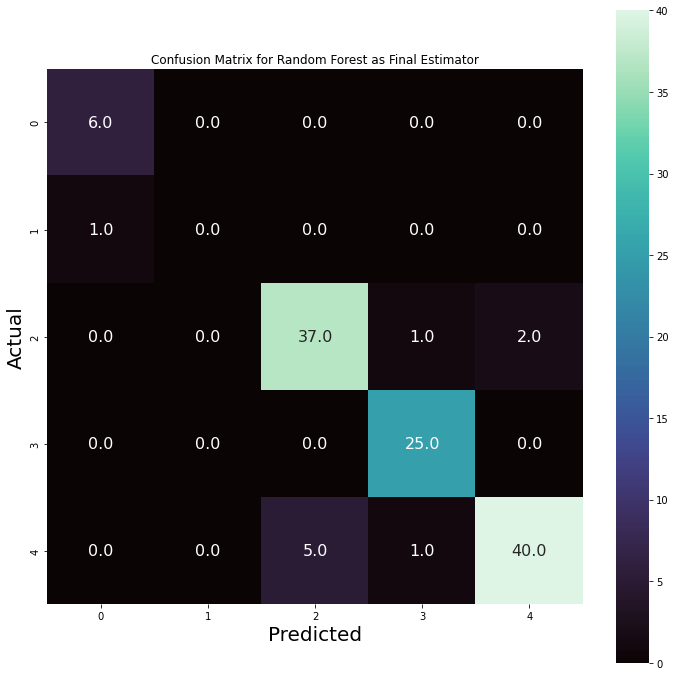

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = newgsearchrandom_pred
label=['0','1', '2','3','4']
Ytrue = Y_test
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Random Forest as Final Estimator")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

**Stacking Classifier - Neural Network**

In [ ]:
newgsearchnnc =  StackingClassifier(estimators=estimators, n_jobs=-1,final_estimator=nnc)
newgsearchnnc.fit(X_train, Y_train)
newgsearchnnc_pred = newgsearchnnc.predict(X_test)
newgsearchnnc_acc=accuracy_score(Y_test, newgsearchnnc_pred)
print(newgsearchnnc_acc)

0.9152542372881356


In [ ]:
print(classification_report(Y_test, newgsearchnnc_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.00      0.00      0.00         1
           2       0.90      0.88      0.89        40
           3       0.96      1.00      0.98        25
           4       0.91      0.91      0.91        46

    accuracy                           0.92       118
   macro avg       0.73      0.76      0.74       118
weighted avg       0.91      0.92      0.91       118



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 145.31999999999996, 'Predicted')

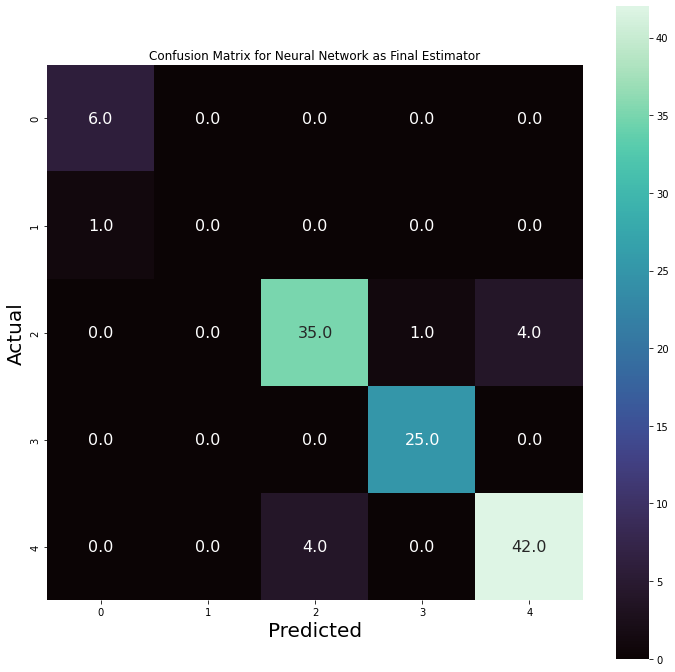

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = newgsearchnnc_pred
label=['0','1', '2','3','4']
Ytrue = Y_test
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for Neural Network as Final Estimator")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

**Stacking - Final estimator KNN**

In [ ]:
newgsearchknn =  StackingClassifier(estimators=estimators, n_jobs=-1,final_estimator=knn)
newgsearchknn.fit(X_train, Y_train)
newgsearchknn_pred = newgsearchknn.predict(X_test)
newgsearchknn_acc=accuracy_score(Y_test, newgsearchknn_pred)
print(newgsearchknn_acc)

0.8983050847457628


In [ ]:
print(classification_report(Y_test, newgsearchknn_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.00      0.00      0.00         1
           2       0.84      0.93      0.88        40
           3       0.96      0.96      0.96        25
           4       0.93      0.85      0.89        46

    accuracy                           0.90       118
   macro avg       0.72      0.75      0.73       118
weighted avg       0.89      0.90      0.89       118



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 145.31999999999996, 'Predicted')

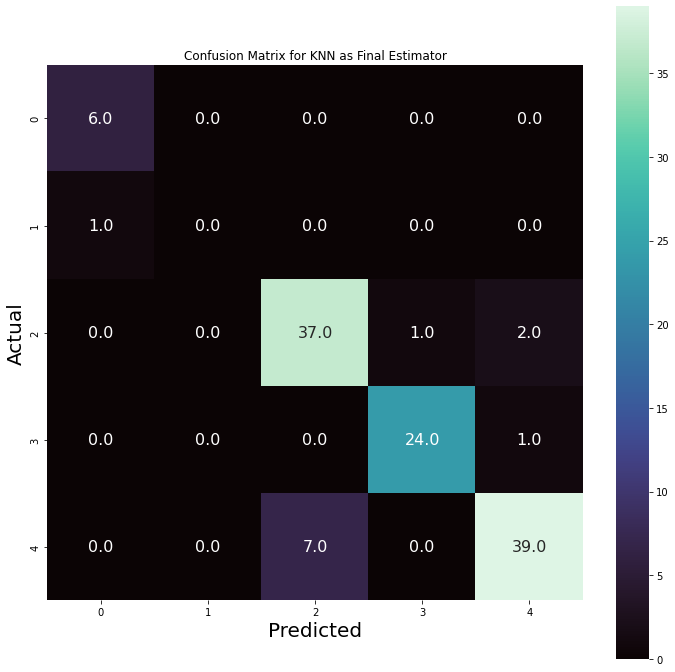

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
Ypred = newgsearchknn_pred 
label=['0','1', '2','3','4']
Ytrue = Y_test
cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix for KNN as Final Estimator")
ax = sns.heatmap(cm, cmap="mako", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)